In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,cross_val_score
#model selection from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#ensemble
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
#metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
#pca
from sklearn.decomposition import PCA
#data_balance
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
#warnings
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [45]:
import os
os.chdir(r'C:\Users\VISHY\Desktop\Great Learning\Capstone\Vehicle-Loan-Default-Prediction\Data')

df = pd.read_csv('train.csv')

df=df.drop(['UniqueID', 'branch_id','supplier_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag'],axis=1)

In [46]:
def credit_risk(df):
    d1=[]
    d2=[]
    for i in df:
        p = i.split("-")
        if len(p) == 1:
            d1.append(p[0])
            d2.append('unknown')
        else:
            d1.append(p[1])
            d2.append(p[0])

    return d1,d2

risk_map = {'No Bureau History Available':-1, 
              'Not Scored: No Activity seen on the customer (Inactive)':-1,
              'Not Scored: Sufficient History Not Available':-1,
              'Not Scored: No Updates available in last 36 months':-1,
              'Not Scored: Only a Guarantor':-1,
              'Not Scored: More than 50 active Accounts found':-1,
              'Not Scored: Not Enough Info available on the customer':-1,
              'Very Low Risk':4,
              'Low Risk':3,
              'Medium Risk':2, 
              'High Risk':1,
              'Very High Risk':0}

sub_risk = {'unknown':-1, 'A':13, 'B':12, 'C':11,'D':10,'E':9,'F':8,'G':7,'H':6,'I':5,'J':4,'K':3, 'L':2,'M':1}
employment_map = {'Self employed':0, 'Salaried':1,np.nan:2}

df.loc[:,'credit_risk'],df.loc[:,'credit_risk_grade']  = credit_risk(df["PERFORM_CNS.SCORE.DESCRIPTION"])
df.loc[:,'credit_risk_label'] = df['credit_risk'].apply(lambda x: risk_map[x])
df.loc[:,'sub_risk_label'] = df['credit_risk_grade'].apply(lambda x: sub_risk[x])

df.loc[:,'employment_label'] = df['Employment.Type'].apply(lambda x: employment_map[x])

df=df.drop(['PERFORM_CNS.SCORE.DESCRIPTION', 'credit_risk', 'credit_risk_grade','Employment.Type'],axis=1)

In [47]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [48]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(duration)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(duration)
#df.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],axis=1,inplace=True)

In [49]:
def age(dur):
    yr = int(dur.split('-')[2])
    if yr >=0 and yr<=19:
        return yr+2000
    else:
         return yr+1900

df['Date.of.Birth'] = df['Date.of.Birth'].apply(age)
df['DisbursalDate'] = df['DisbursalDate'].apply(age)
df['Age']=df['DisbursalDate']-df['Date.of.Birth']
df=df.drop(['DisbursalDate','Date.of.Birth'],axis=1)

In [58]:
y=df['loan_default']
x=df.drop('loan_default',axis=1)

In [59]:
sm = SMOTE(random_state=40)
x, y = sm.fit_sample(x, y.ravel())

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs=sc.fit_transform(x)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.30, random_state=42)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [63]:
lr=LogisticRegression()
nb= GaussianNB()
knn=KNeighborsClassifier()
#dt=DecisionTreeClassifier(random_state=0, criterion='entropy')
#ranforest=RandomForestClassifier(random_state=0,n_estimators=43,criterion='gini')
#bag=BaggingClassifier(n_estimators=26, random_state=0)
#adab=AdaBoostClassifier(n_estimators=10)
#adabLog=AdaBoostClassifier(base_estimator=lr,n_estimators=5)
#gb=GradientBoostingClassifier(n_estimators=55)

In [64]:
var=[]
for i in np.arange(1,21):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    random = RandomForestClassifier(criterion='entropy',n_estimators=i,random_state=0)
    scores=cross_val_score(random,xs,y,cv=3,scoring='f1_weighted')
    var.append(np.var(scores,ddof=1))
    print(i, np.var(scores,ddof=1))

1 0.0076354479062190365
2 0.022649211357032822
3 0.013336183367467874
4 0.024427631687146102
5 0.016303649639878338
6 0.024889780084966836
7 0.017686677281977897
8 0.02492860738503396
9 0.018993610191584607
10 0.02523600984115831
11 0.020122126481412456
12 0.02552195132952571
13 0.02085763855244822
14 0.025544978169634382
15 0.021401636190817197
16 0.02558224480306241
17 0.02169307868235991
18 0.02551791058282092
19 0.022139836541766916
20 0.025550787793400566


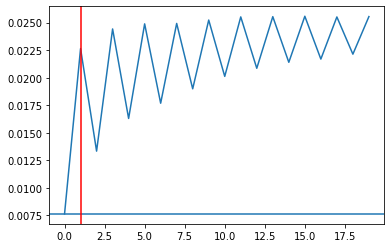

In [68]:
plt.plot(var)
plt.axhline(y=np.min(var))
np.min(var)
xx=np.arange(1,21)
max_x = xx[var.index(np.min(var))]
plt.axvline(max_x,color='r')

In [69]:
max_x

1

In [70]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['entropy','gini']}
ranforest=RandomForestClassifier(n_estimators=max_x,random_state=0)
grid=GridSearchCV(ranforest, params, cv=3, scoring='f1_weighted')
grid.fit(xs,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1, n_jobs=None,
                                              oob_score=False, random_state=0,
                                     

In [71]:
print(grid.best_score_)
print(grid.best_params_)

0.6871906478973161
{'criterion': 'entropy'}


In [72]:
rf=RandomForestClassifier(n_estimators=max_x,random_state=0, criterion='entropy')
rf.fit(xs,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

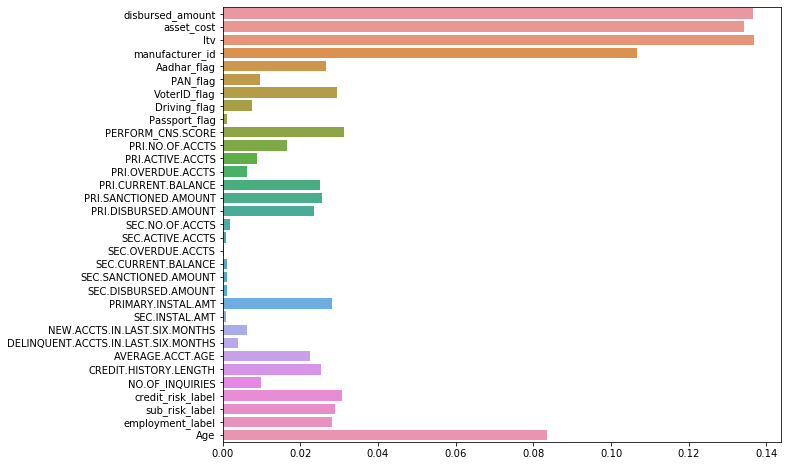

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(x=rf.feature_importances_,y=x.columns)

In [74]:
scores=[]
for i in np.arange(1,21):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    bag = BaggingClassifier(n_estimators=i, random_state=0)
    results = cross_val_score(bag, xs, y, cv=kf)
    scores.append(np.var(results,ddof=1))
    print(i, np.var(results,ddof=1))

1 7.76754769794499e-07
2 4.368905138865102e-07
3 2.6917642700241197e-07
4 9.54955272254947e-07
5 1.5437150243144964e-06
6 1.825525720205728e-07
7 9.572818217967127e-08
8 2.136414617034604e-07
9 4.62168395597854e-07
10 4.988699734357098e-09
11 1.6084101806633916e-07
12 2.811935204968885e-07
13 3.078966945884241e-07
14 4.1620805908776674e-07
15 1.3938923092885804e-07
16 1.4779406560312642e-08
17 2.6739955937658583e-07
18 1.1089258611185731e-07
19 3.2227908522527594e-07
20 5.74092508236589e-07


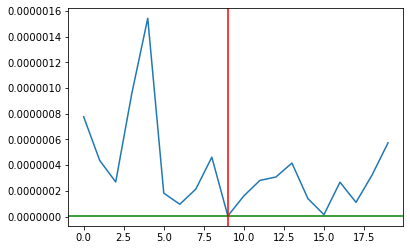

In [75]:
xx=np.arange(0,51)
plt.plot(scores)
plt.axhline(y=np.min(scores),color='g')
np.min(scores)
xx=np.arange(0,51)
max_x = xx[scores.index(np.min(scores))]
plt.axvline(max_x,color='r')

In [92]:
bag = BaggingClassifier(n_estimators=9, random_state=0)
bag.fit(xs,y)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=9,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)

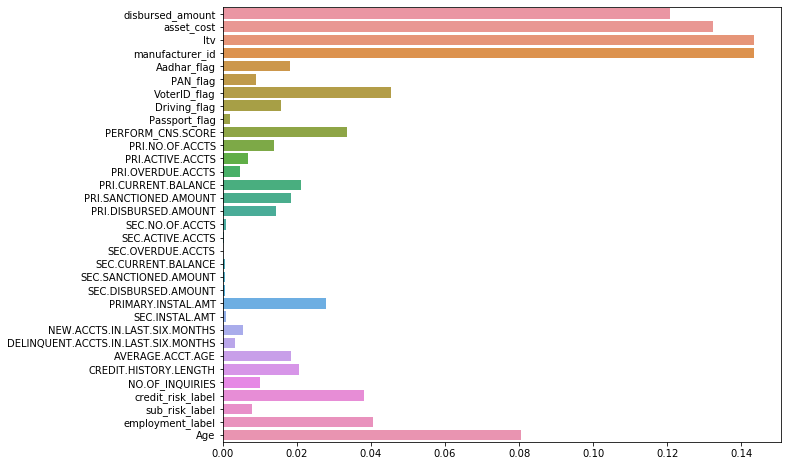

In [77]:
feature_importances = np.mean([tree.feature_importances_ for tree in bag.estimators_], axis=0)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_importances,y=x.columns)

In [78]:
scores=[]
for i in np.arange(1,21):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    adab = AdaBoostClassifier(n_estimators=i, random_state=0)
    results = cross_val_score(adab, xs, y, cv=kf, scoring='f1_weighted')
    scores.append(1-np.mean(results))
    print(i,1-np.mean(results))

1 0.41280432447801785
2 0.3782635959966555
3 0.3782635959966555
4 0.3624212159191653
5 0.3526726390843481
6 0.3367892461706625
7 0.33493401863125427
8 0.32022070460740837
9 0.30964710977514587
10 0.3093624438675101
11 0.306804090890589
12 0.30229040895522097
13 0.3049760094378816
14 0.2975466108686038
15 0.2963016881758058
16 0.2939436752940937
17 0.2929745923565722
18 0.29103806209714644
19 0.2917408688554054
20 0.28866504252191494


In [79]:
len(scores)

20

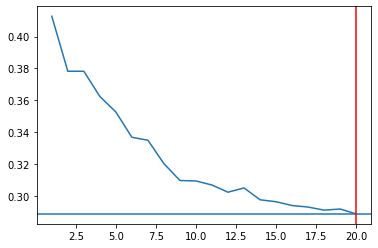

In [80]:
xx=np.arange(1,21)
plt.plot(xx,scores)
plt.axhline(np.min(scores))
np.min(scores)
max_x = xx[scores.index(np.min(scores))]
plt.axvline(max_x,color='r')

In [81]:
max_x

20

In [82]:
adab = AdaBoostClassifier(n_estimators=max_x, random_state=0)

In [83]:
lr=LogisticRegression()
scores=[]
for i in np.arange(1,21):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    adab = AdaBoostClassifier(base_estimator=lr,n_estimators=i, random_state=0)
    results = cross_val_score(adab, xs, y, cv=kf, scoring='f1_weighted')
    scores.append(1-np.mean(results))
    print(i,1-np.mean(results))

1 0.36034361913050716
2 0.34973469058054596
3 0.3436613060607462
4 0.33971539718160326
5 0.33725083503742526
6 0.33578313502233514
7 0.3348309187523114
8 0.33431422011259515
9 0.3335841015126534
10 0.33325934323190853
11 0.33283507355748687
12 0.33244905933039004
13 0.33205361064533445
14 0.33178015760534885
15 0.3315894194176393
16 0.3313417903268002
17 0.33107064121502194
18 0.3308268206919406
19 0.33056229180867225
20 0.3302706131733295


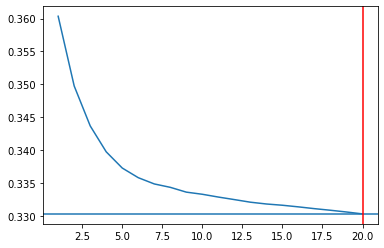

In [84]:
xx=np.arange(1,21)
plt.plot(xx,scores)
plt.axhline(np.min(scores))
np.min(scores)
max_x = xx[scores.index(np.min(scores))]
plt.axvline(max_x,color='r')

In [85]:
adablog = AdaBoostClassifier(base_estimator=lr,n_estimators=max_x, random_state=0)

In [86]:
scores=[]
for i in np.arange(1,21):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    gb = GradientBoostingClassifier(n_estimators=i, random_state=0)
    results = cross_val_score(gb, xs, y, cv=kf, scoring='f1_weighted')
    scores.append(1-np.mean(results))
    print(i,1-np.mean(results))

1 0.3782635959966555
2 0.3782635959966555
3 0.36457679286075695
4 0.3568580565819599
5 0.33633052017423903
6 0.32838516335707135
7 0.3216120481527742
8 0.31477916664908934
9 0.31265934826109587
10 0.3054680260623176
11 0.3004712791409755
12 0.2960272849341612
13 0.2955206279607454
14 0.28867095796780884
15 0.2887184796838329
16 0.2868650239830194
17 0.28298831276366043
18 0.2817135538270946
19 0.2807134817854039
20 0.2790428426084336


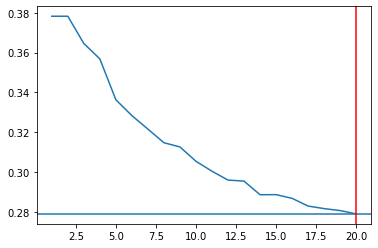

In [87]:
xx=np.arange(1,21)
plt.plot(xx,scores)
plt.axhline(np.min(scores))
np.min(scores)
max_x = xx[scores.index(np.min(scores))]
plt.axvline(max_x,color='r')

In [88]:
gb = GradientBoostingClassifier(n_estimators=max_x, random_state=0)

In [93]:
models=[]
models.append(('Log',lr))
models.append(('RF',rf))
models.append(('BAG',bag))
models.append(('AdaB',adab))
models.append(('LogisAdaB',adablog))
models.append(('GBoost',gb))
'''models.append(('Votingclass',vc))'''

"models.append(('Votingclass',vc))"

Log
0.6869153482228999   7.548470918883824e-07
RF
0.6984309475646447   0.00016655560069073287
BAG
0.7251892958423208   0.0017152433995479544
AdaB
0.7113243185884083   0.001876665381303668
LogisAdaB
0.7030053322360607   0.0017711764167910894
GBoost
0.7059973030953117   0.0015062934081499426


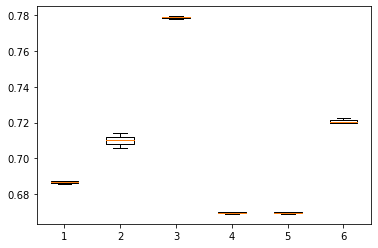

In [94]:
scores=[]
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for name,model in models:
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    cv_score=cross_val_score(model,xs,y,cv=kf,scoring='f1_weighted')
    scores.append(cv_score)
    print(name)
    print(np.mean(scores), " ",np.var(scores,ddof=1))
fig=plt.figure()
ax=fig.add_subplot(111)
plt.boxplot(scores)
plt.show()

In [91]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'manufacturer_id',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'credit_risk_label', 'sub_risk_label', 'employment_label', 'Age'],
      dtype='object')